## 12.4 Homework

- 1. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1/2}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = x^{-1/2}$, with 1,000,000 random points.

- 2. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = 1/x$, with 1,000,000 random points. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

#### 1) Calculate a value for the integral:
$$ I = \int_0 ^1 \frac{x^{-1/2}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = x^{-1/2}$, with 1,000,000 random points.

/home/erick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/erick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/erick/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


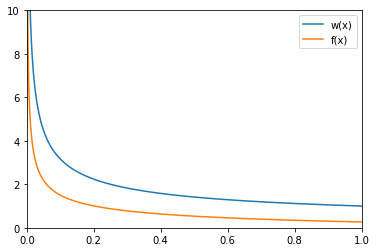

In [2]:
#We are given the following info for part 1:
N = 1000000
a = 0
b = 1

def w_1(x):
    return 1/(np.sqrt(x))

#I = int(f(x))
def f_1(x):
    return 1/np.sqrt(x)/(np.exp(x)+1)

#Given from lecture 12
def p_1(x):
    return x**2


x_1 = np.linspace(a, b, N)

plt.plot(x_1, w_1(x_1), label = "w(x)")
plt.plot(x_1, f_1(x_1), label = "f(x)")
plt.xlim([0,1])
plt.ylim([0,10])
plt.legend()
plt.show()

In [3]:
#Expected integral:
print('from scipy: ', integrate.quad(f_1, 0, 1)[0])

from scipy:  0.8389329600133838


In [4]:

def IMC(N):
    weight = integrate.quad(w_1, a, b)[0]
    x = np.random.random(N) #N values from [0,1)
    y = p_1(x)
    
    I = weight/N * np.sum(np.divide(f_1(y), w_1(y)))

    return I

print("Area under the curve is approximately: ", IMC(N))

Area under the curve is approximately:  0.8389153538390286


This lines up closely with our expected value in the preceding cell. We can confirm that we have created the appropriate function for problem 1). Now, we move onto problem 2:

#### 2. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = 1/x$, with 1,000,000 random points.

/home/erick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/erick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


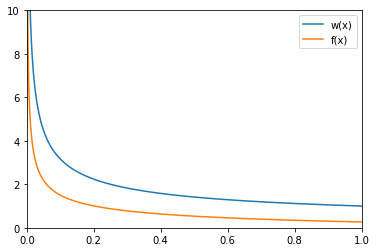

In [8]:
#We are given the following info for part 1:
N = 1000000
a = 0
b = 1

def w_2(x):
    return 1/x

#I = int(f(x))
def f_2(x):
    return np.divide(1/x,(np.exp(x)+1))

#Not sure if this is correct
def p_2(x):
    return np.divide(w_2(x), integrate.quad(w_2, a, b)[0])


x_2 = np.linspace(a, b, N)

plt.plot(x_2, w_1(x_2), label = "w(x)")
plt.plot(x_2, f_1(x_2), label = "f(x)")
plt.xlim([0,1])
plt.ylim([0,10])
plt.legend()
plt.show()

In [9]:
print('from scipy: ', integrate.quad(f_2, 0, 1)[0])

from scipy:  20.594976039904015


/home/erick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


In [10]:

def IMC(N):
    weight = integrate.quad(w_2, a, b)[0]
    x = np.random.random(N) #N values from [0,1)
    y = p_2(x)
    
    I = weight/N * np.sum(np.divide(f_2(y), w_2(y)))

    return I

print("Area under the curve is approximately: ", IMC(N))

Area under the curve is approximately:  19.539664343168326


/home/erick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  
/home/erick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on

# Conclusion

Both parts yeilded close results to the expected results. While part 2 of the homework yielded slightly inaccurate results (inaccurate by ~1), both were overall extremely close to the expected value.